# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 0
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out required information
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    except Exception as e:
        print(f"City not found. Skipping... Error: {e}")
        continue

    # pause to avoid rate limiting
    time.sleep(1)

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 0 of Set 1 | blackmans bay
Processing Record 1 of Set 1 | lubuklinggau
Processing Record 2 of Set 1 | aguililla
Processing Record 3 of Set 1 | crane
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | yakeshi
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | susuman
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | baruun-urt
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | utrik
Processing Record 14 of Set 1 | malpica
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | port mathurin
Processing Record 17 of Set 1 | barinitas
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | saquarema
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | kirensk
Processing Record 22 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,14.85,65,50,3.58,AU,1725482688
1,lubuklinggau,-3.3000,102.8667,24.03,82,100,0.80,ID,1725482689
2,aguililla,18.7333,-102.7333,28.18,68,59,1.02,MX,1725482690
3,crane,31.3974,-102.3501,26.28,58,80,1.23,US,1725482691
4,thompson,55.7435,-97.8558,13.09,54,75,4.63,CA,1725482693


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,14.85,65,50,3.58,AU,1725482688
1,lubuklinggau,-3.3000,102.8667,24.03,82,100,0.80,ID,1725482689
2,aguililla,18.7333,-102.7333,28.18,68,59,1.02,MX,1725482690
3,crane,31.3974,-102.3501,26.28,58,80,1.23,US,1725482691
4,thompson,55.7435,-97.8558,13.09,54,75,4.63,CA,1725482693


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

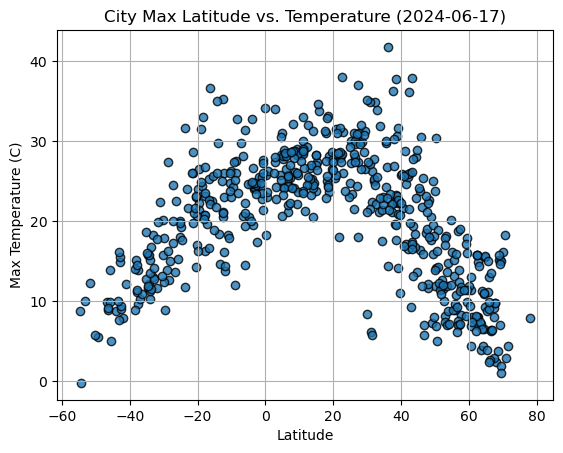

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1A.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

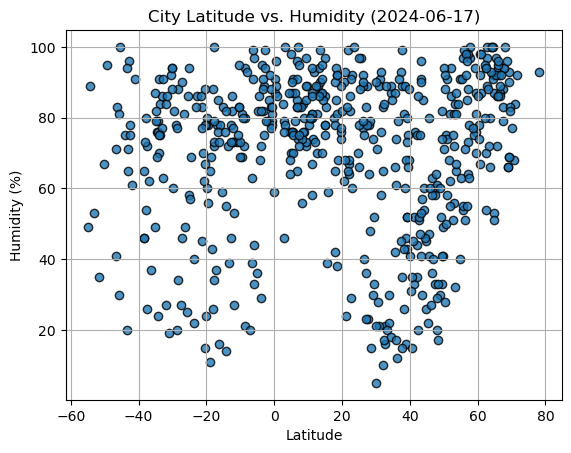

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2A.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

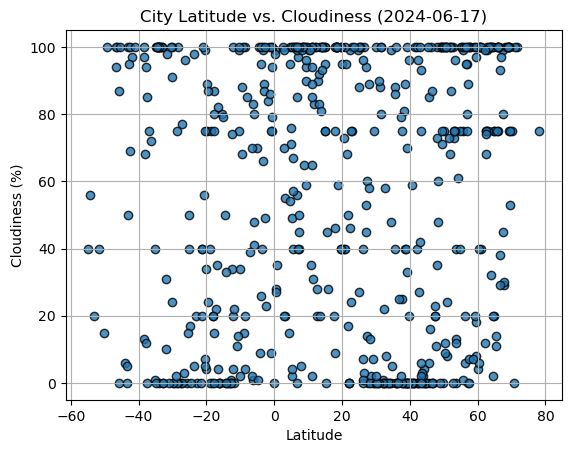

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3A.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

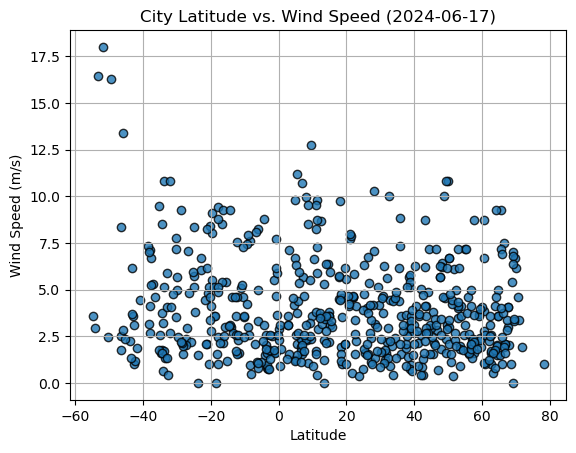

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4A.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,aguililla,18.7333,-102.7333,28.18,68,59,1.02,MX,1725482690
3,crane,31.3974,-102.3501,26.28,58,80,1.23,US,1725482691
4,thompson,55.7435,-97.8558,13.09,54,75,4.63,CA,1725482693
7,yakeshi,49.2833,120.7333,7.30,52,100,2.37,CN,1725482697
9,susuman,62.7833,148.1667,6.95,89,99,1.63,RU,1725482699


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,14.85,65,50,3.58,AU,1725482688
1,lubuklinggau,-3.3000,102.8667,24.03,82,100,0.80,ID,1725482689
5,waitangi,-43.9535,-176.5597,8.79,75,6,2.24,NZ,1725482694
6,ushuaia,-54.8000,-68.3000,8.81,49,40,3.60,AR,1725482695
8,adamstown,-25.0660,-130.1015,17.96,58,50,5.72,PN,1725482698


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.554503680866972


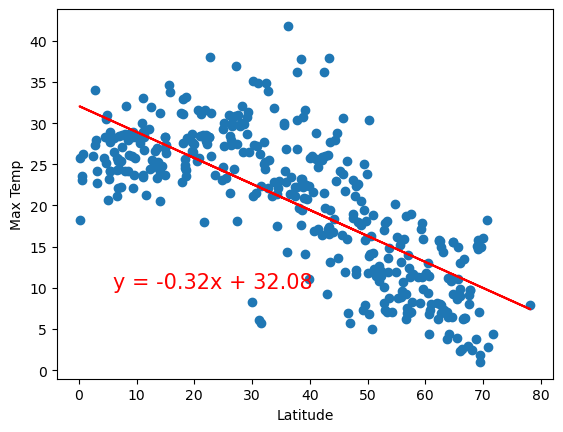

PearsonRResult(statistic=-0.744650039190875, pvalue=9.171352681151916e-70)

In [17]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
title = "Max Temp"
text_coordinates = (6, 10)
plot_linear_regression(x_values, y_values, title, text_coordinates)
correlation = st.pearsonr(x_values, y_values)
correlation

The r-squared is: 0.5562127708266122


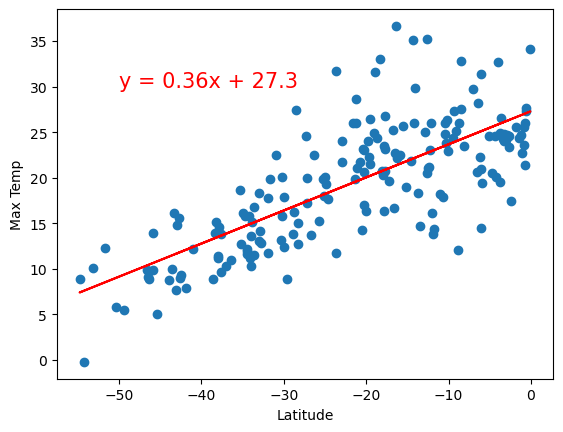

PearsonRResult(statistic=0.7457967355966457, pvalue=1.3961383145037375e-33)

In [18]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
title = "Max Temp" 
text_coordinates = (-50, 30)
plot_linear_regression(x_values, y_values, title, text_coordinates)
correlation = st.pearsonr(x_values, y_values)
correlation

## **Discussion about the linear relationship between latitude and maximum temperature:**
## Northern hemisphere:
The negative Pearson r indicates an inverse relationship between the latitude and maximum temperature variables in the northern hemisphere. As one variable increases, the other tends to decrease. The absolute value of r (0.7447) suggests a strong linear relationship. The R-squared value of 0.5545 indicates that about 55.45% of the variability in one variable can be explained by its linear relationship with the other variable. While this is substantial, it also suggests that other factors may influence the dependent variable.The extremely low p-value provides strong evidence against the null hypothesis (which would state that there is no relationship between the variables). This supports the conclusion that the observed relationship is not due to random chance. While the model explains a significant portion of the variability, there's still about 44.55% of the variance unaccounted for. This suggests that while the model has predictive value, predictions may not be highly precise. In conclusion, the statistics indicate a strong, statistically significant negative linear relationship between the two variables. The model has moderate explanatory power, accounting for over half of the variability in the data. However, other factors not included in this simple linear model likely play a role in determining the dependent variable's values. For more comprehensive understanding or prediction, considering additional variables or non-linear relationships might be beneficial.

## Southern Hemisphere
The positive Pearson r indicates a direct relationship between the latitude and maximum temperature variables in the southern hemisphere. As one variable increases, the other tends to increase as well. The value of r (0.7458) suggests a strong linear relationship. Values closer to 1 (or -1) indicate stronger linear relationships, with 0 indicating no linear relationship. The R-squared value of 0.5562 indicates that about 55.62% of the variability in one variable can be explained by its linear relationship with the other variable. This is a substantial amount, though it also suggests that other factors may influence the dependent variable. The extremely low p-value (1.396e-33) provides very strong evidence against the null hypothesis (which would state that there is no relationship between the variables). This strongly supports the conclusion that the observed relationship is not due to random chance. While the model explains a significant portion of the variability, there's still about 44.38% of the variance unaccounted for. This suggests that while the model has good predictive value, predictions may not be highly precise. In conclusion, the statistics indicate a strong, statistically significant positive linear relationship between the two variables. The model has moderate to good explanatory power, accounting for over half of the variability in the data. This relationship is highly unlikely to be due to chance, as evidenced by the extremely low p-value.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0006844858427078631


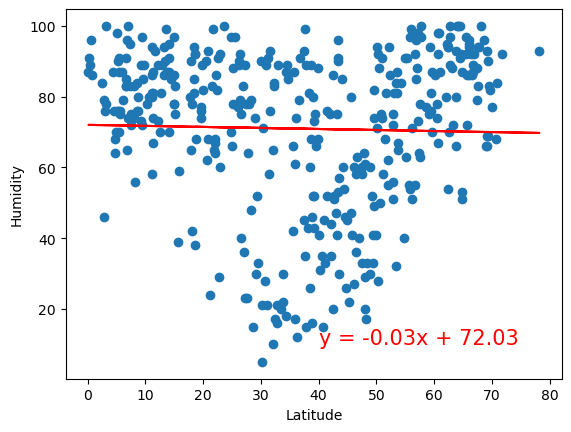

PearsonRResult(statistic=-0.02616268034257696, pvalue=0.6074126212754042)

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
title = "Humidity"
text_coordinates = (40, 10)
plot_linear_regression(x_values, y_values, title, text_coordinates)
correlation = st.pearsonr(x_values, y_values)
correlation

The r-squared is: 0.011267484849811719


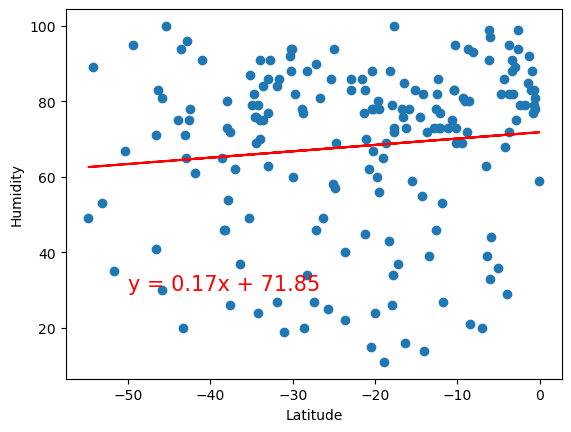

PearsonRResult(statistic=0.10614840954913893, pvalue=0.15381456811097713)

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
title = "Humidity"
text_coordinates = (-50, 30)
plot_linear_regression(x_values, y_values, title, text_coordinates)
correlation = st.pearsonr(x_values, y_values)
correlation

## **Discussion about the linear relationship between latitude and humidity:**
## Northern hemisphere:
The negative Pearson r indicates a very slight inverse relationship between the latitude and humidity variables in the northern hemisphere. However, the magnitude is so small that it's practically negligible. The absolute value of r (0.0262) suggests an extremely weak linear relationship. This value is very close to 0, indicating essentially no linear relationship between the variables. The R-squared value of 0.0006845 indicates that only about 0.068% of the variability in one variable can be explained by its linear relationship with the other variable. This is an extremely small amount, suggesting that the linear model has virtually no explanatory power. The high p-value (0.6074) provides no evidence against the null hypothesis (which states that there is no relationship between the variables). This supports the conclusion that any observed relationship is likely due to random chance rather than a true underlying relationship. With such a low R-squared value, the model has essentially no predictive power. Using one variable to predict the other would be no better than guessing. In conclusion, the statistics indicate an extremely weak, statistically insignificant linear relationship between these two variables. The model has virtually no explanatory power, accounting for less than 0.1% of the variability in the data. This relationship is highly likely to be due to random chance, as evidenced by the high p-value.

## Southern Hemisphere
The positive Pearson r indicates a slight direct relationship between the latitude and humidity variables in the southern hemisphere. As one variable increases, the other tends to increase very slightly as well, but the relationship is weak. The value of r (0.1061) suggests a weak linear relationship. This value is relatively close to 0, indicating a very mild linear relationship between the variables. The R-squared value of 0.011267 indicates that only about 1.13% of the variability in one variable can be explained by its linear relationship with the other variable. This is a very small amount, suggesting that the linear model has very little explanatory power. The high p-value (0.1538) provides no strong evidence against the null hypothesis (which states that there is no relationship between the variables). This supports the conclusion that any observed relationship could easily be due to random chance rather than a true underlying relationship. With such a low R-squared value, the model has very little predictive power. Using one variable to predict the other would be only marginally better than guessing. In conclusion, the statistics indicate a weak, statistically insignificant linear relationship between the two variables. The model has very little explanatory power, accounting for only about 1.13% of the variability in the data. This relationship is likely to be due to random chance, as evidenced by the high p-value.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0006505581993618855


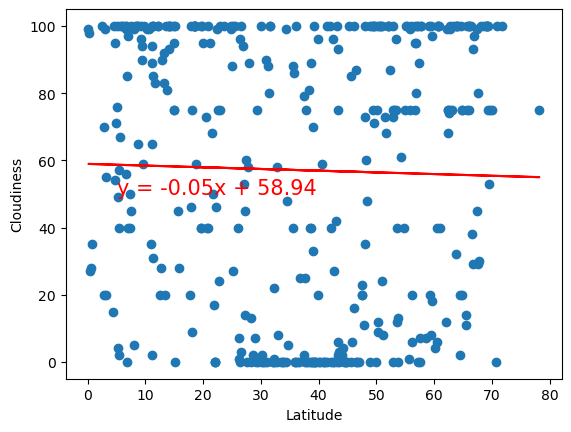

PearsonRResult(statistic=-0.02550604240884669, pvalue=0.6164617249061197)

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
title = "Cloudiness"
text_coordinates = (5, 50)
plot_linear_regression(x_values, y_values, title, text_coordinates)
correlation = st.pearsonr(x_values, y_values)
correlation

The r-squared is: 0.002001376749781421


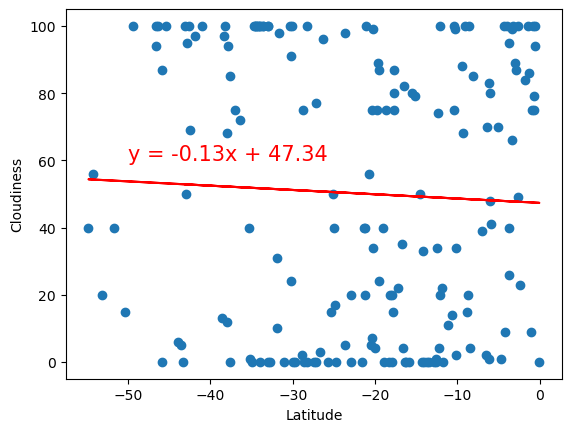

PearsonRResult(statistic=-0.0447367494324456, pvalue=0.5487236540054407)

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness'] 
title = "Cloudiness"
text_coordinates = (-50, 60)
plot_linear_regression(x_values, y_values, title, text_coordinates)
correlation = st.pearsonr(x_values, y_values)
correlation

## **Discussion about the linear relationship between latitude and cloudiness:** 
## Northern hemisphere:
The negative Pearson r indicates a very slight inverse relationship between the latitude and cloudiness variables in the northern hemisphere. However, the magnitude is so small that it's practically negligible. The absolute value of r (0.0255) suggests an extremely weak linear relationship. This value is very close to 0, indicating essentially no linear relationship between the variables. The R-squared value of 0.0006506 indicates that only about 0.065% of the variability in one variable can be explained by its linear relationship with the other variable. This is an extremely small amount, suggesting that the linear model has virtually no explanatory power. The high p-value (0.6165) provides no evidence against the null hypothesis (which states that there is no relationship between the variables). This supports the conclusion that any observed relationship is likely due to random chance rather than a true underlying relationship. With such a low R-squared value, the model has essentially no predictive power. Using one variable to predict the other would be no better than guessing. In conclusion, the statistics indicate an extremely weak, statistically insignificant linear relationship between the two variables. The model has virtually no explanatory power, accounting for less than 0.1% of the variability in the data. This relationship is highly likely to be due to random chance, as evidenced by the high p-value.

## Southern Hemisphere
The negative Pearson r indicates a very slight inverse relationship between the latitude and cloudiness variables in the southern hemisphere. However, the magnitude is so small that it's practically negligible. The absolute value of r (0.0447) suggests an extremely weak linear relationship. This value is very close to 0, indicating essentially no linear relationship between the variables. The R-squared value of 0.002001 indicates that only about 0.2% of the variability in one variable can be explained by its linear relationship with the other variable. This is an extremely small amount, suggesting that the linear model has virtually no explanatory power. The high p-value (0.5487) provides no evidence against the null hypothesis (which states that there is no relationship between the variables). This supports the conclusion that any observed relationship is likely due to random chance rather than a true underlying relationship. With such a low R-squared value, the model has essentially no predictive power. Using one variable to predict the other would be no better than guessing. In conclusion, the statistics indicate an extremely weak, statistically insignificant linear relationship between the two variables. The model has virtually no explanatory power, accounting for only 0.2% of the variability in the data. This relationship is highly likely to be due to random chance, as evidenced by the high p-value.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0074805500243948


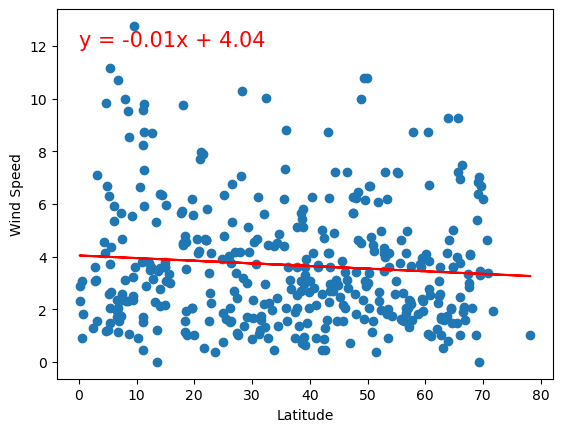

PearsonRResult(statistic=-0.08649017299320666, pvalue=0.08887700212855001)

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
title = "Wind Speed"
text_coordinates = (0, 12)
plot_linear_regression(x_values, y_values, title, text_coordinates)
correlation = st.pearsonr(x_values, y_values)
correlation

The r-squared is: 0.05171289435289593


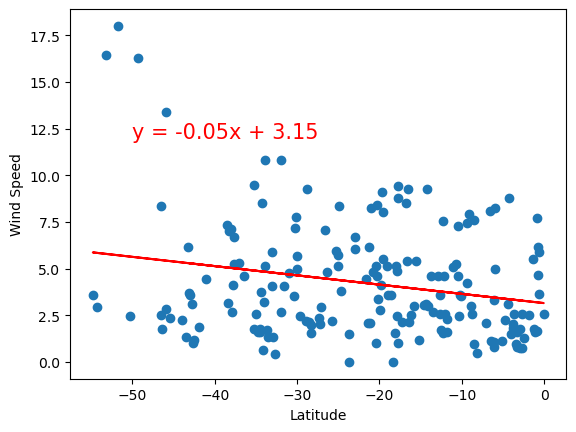

PearsonRResult(statistic=-0.22740469289989584, pvalue=0.002020036143638048)

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
title = "Wind Speed"
text_coordinates = (-50, 12)
plot_linear_regression(x_values, y_values, title, text_coordinates)
correlation = st.pearsonr(x_values, y_values)
correlation

## **Discussion about the linear relationship between latitude and windspeed:**

## Northern Hemisphere
The negative Pearson r indicates a slight inverse relationship between the latitude and windspeed variables in the southern hemisphere. As one variable increases, the other tends to decrease very slightly, but the relationship is weak. The absolute value of r (0.0865) suggests a weak linear relationship. This value is relatively close to 0, indicating a very mild linear relationship between the variables. The R-squared value of 0.0074805 indicates that only about 0.75% of the variability in one variable can be explained by its linear relationship with the other variable. This is a very small amount, suggesting that the linear model has very little explanatory power. The p-value (0.0889) is close to but above the conventional 0.05 threshold. This provides weak evidence against the null hypothesis (which states that there is no relationship between the variables). While not statistically significant at the 0.05 level, it suggests there might be a very weak relationship that could be worth further investigation. With such a low R-squared value, the model has very little predictive power. Using one variable to predict the other would be only marginally better than guessing. In conclusion, the statistics indicate a weak, statistically non-significant (but borderline) linear relationship between the two variables. The model has very little explanatory power, accounting for less than 1% of the variability in the data.

## Southern Hemisphere
The negative Pearson r indicates an inverse relationship between the latitude and windspeed variables in the southern hemisphere. As one variable increases, the other tends to decrease, and vice versa. The absolute value of r (0.2274) suggests a weak to moderate linear relationship. While not strong, this relationship is more substantial than what would be expected by chance. The R-squared value of 0.05171 indicates that about 5.17% of the variability in one variable can be explained by its linear relationship with the other variable. While this is a small amount, it's not negligible and suggests there is some predictive power in the model. The very low p-value (0.00202) provides strong evidence against the null hypothesis (which would state that there is no relationship between the variables). This supports the conclusion that the observed relationship, while weak, is likely to represent a true underlying relationship rather than random chance. While the model explains only a small portion of the variability, it does have some predictive power. However, predictions based on this model alone would not be highly accurate. In conclusion, the statistics indicate a weak to moderate, statistically significant negative linear relationship between the two variables. The model has limited but not negligible explanatory power, accounting for about 5.17% of the variability in the data.